In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Insurance Premium Prediction Dataset
df = pd.read_csv("F:/Datasets/insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\Kalyan\AppData\Local\Temp\ipykernel_6352\3873850429.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


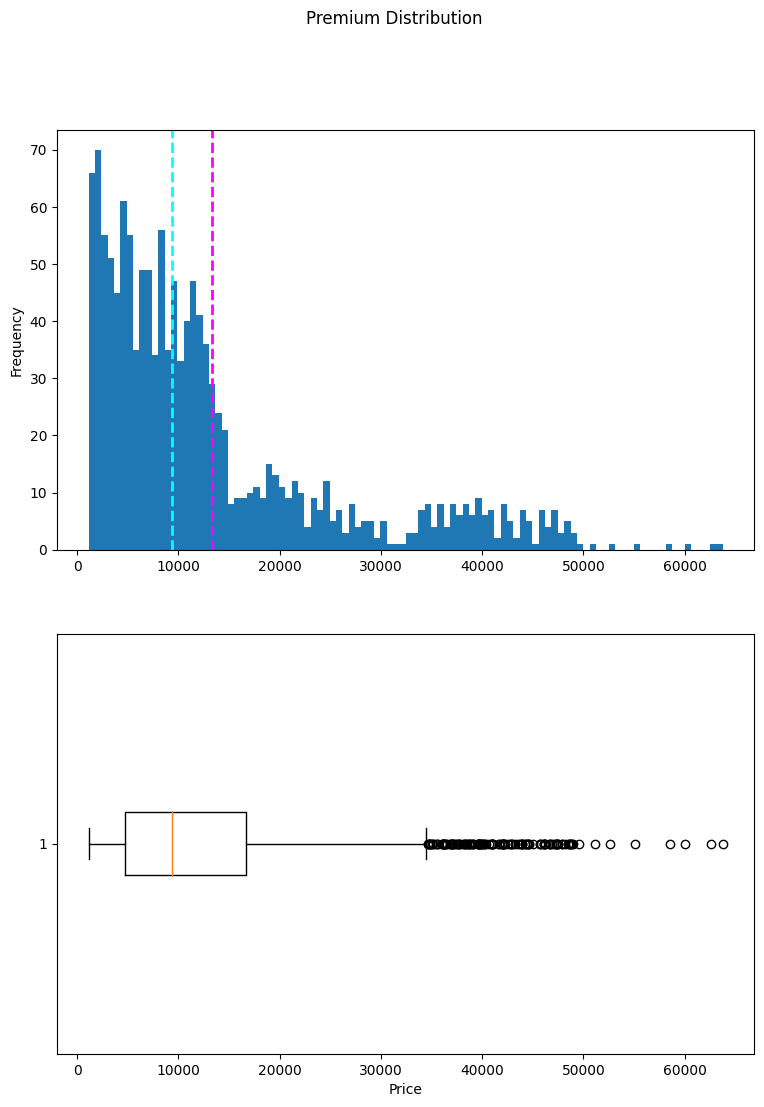

In [11]:
# To check if there is an outlier
label = df["expenses"]
# label = df[df.columns[6]]
fig , ax = plt.subplots(2,1,figsize = (9,12))
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
ax[0].axvline(label.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)


ax[1].boxplot(label,vert = False)
ax[1].set_xlabel('Price')

fig.suptitle('Premium Distribution')

fig.show()

C:\Users\Kalyan\AppData\Local\Temp\ipykernel_6352\791350272.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


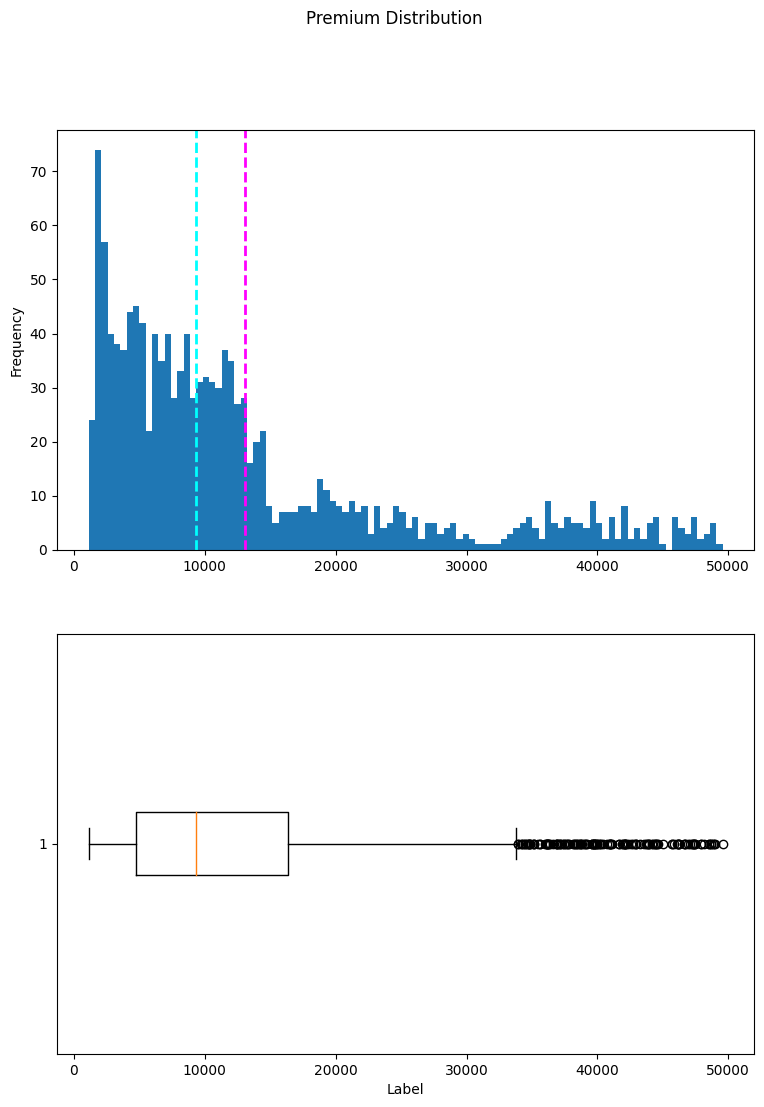

In [12]:
# Here we can see the outliers of Price > 50000
df = df[df['expenses']<50000]
# Get the label column
label = df[df.columns[6]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Premium Distribution')

# Show the figure
fig.show()

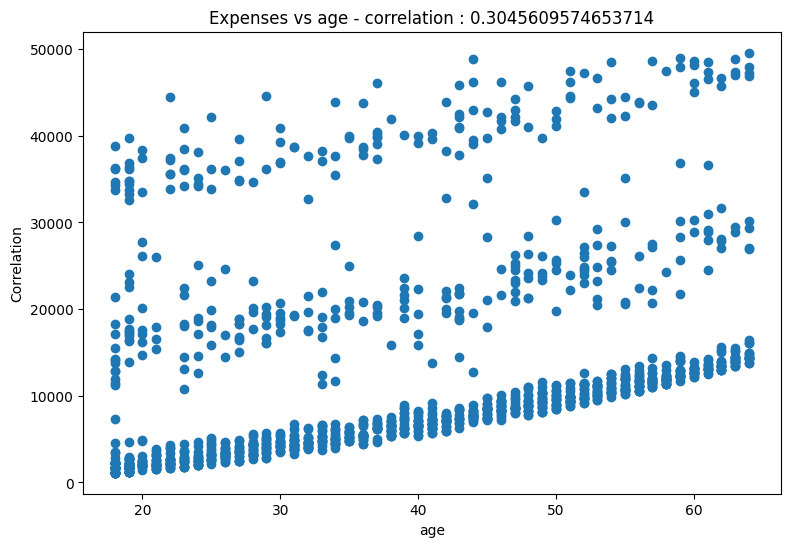

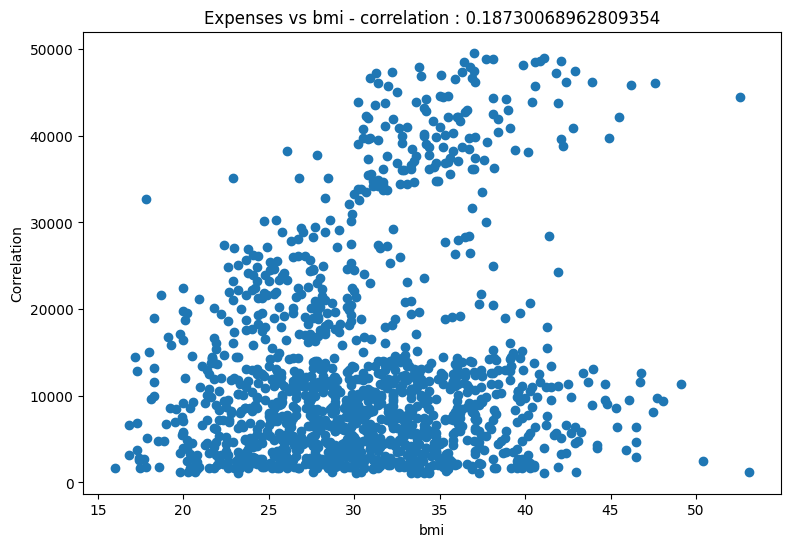

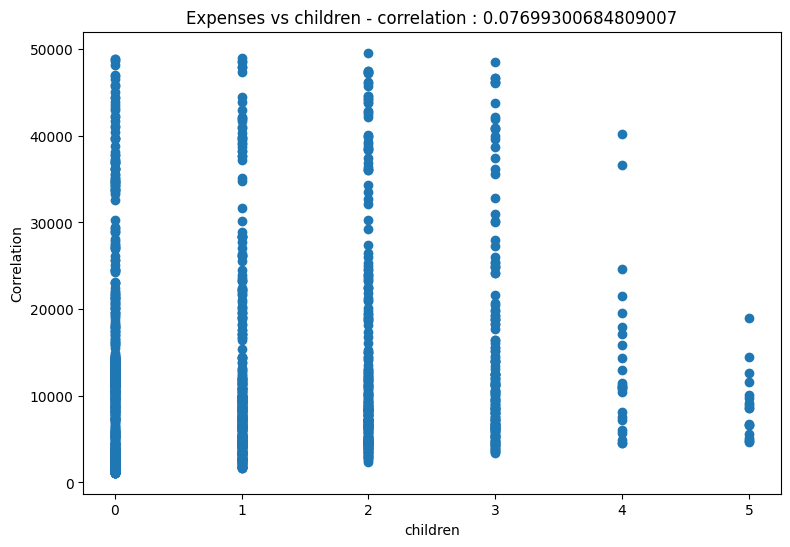

In [13]:
num_cols = ['age','bmi','children']
for col in num_cols:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    
    feature = df[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Correlation')
    ax.set_title('Expenses vs '+col+' - correlation : '+ str(correlation))
    
    plt.show()

In [17]:
sex = {'male':1,'female':0}
smoker = {'yes':1,'no':0}

df.sex = [sex[item] for item in df.sex]
df.smoker = [smoker[item] for item in df.smoker]

C:\Users\Kalyan\AppData\Local\Temp\ipykernel_6352\1178689696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = [sex[item] for item in df.sex]
C:\Users\Kalyan\AppData\Local\Temp\ipykernel_6352\1178689696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.smoker = [smoker[item] for item in df.smoker]


In [18]:
##  one hot encoding region
dummies_r = pd.get_dummies(df["region"], prefix="region")
df = pd.concat([df,dummies_r], axis=1)
df = df.drop("region", axis=1)

In [19]:
X = df.drop(['expenses'],axis=1)
y=df['expenses']

In [20]:
from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
# We will normalize the numerical features in rnage of [0,1] using 
# min-max scaler in sklearn
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_train[num_cols] = minmax.fit_transform(X_train[num_cols])
X_test[num_cols] = minmax.transform(X_test[num_cols])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [31744. 13568.  9216. 36096.  6016. 30464.  1792. 26112. 11264. 11648.]
Actual labels   :  1304    21259.38
446     12731.00
459      7682.67
252     44260.75
979      4889.04
153     19964.75
529      1708.00
994     16420.49
242     35160.13
382     20781.49
Name: expenses, dtype: float64


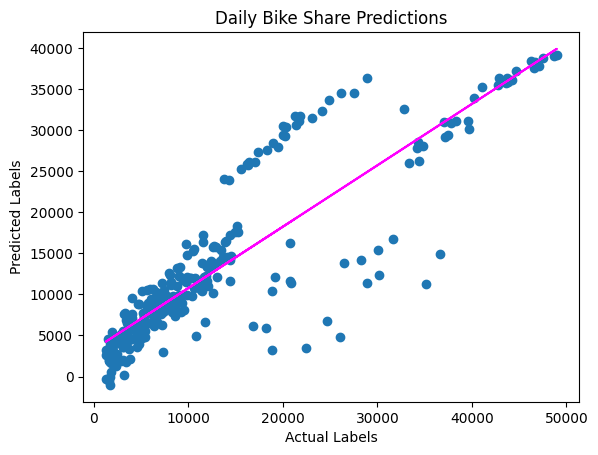

MSE: 34958141.225890264
RMSE: 5912.541012618032
R2: 0.7575080220718681


In [23]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

RandomForestRegressor() 

MSE: 17976934.653793935
RMSE: 4239.921538636527
R2: 0.875300508310357


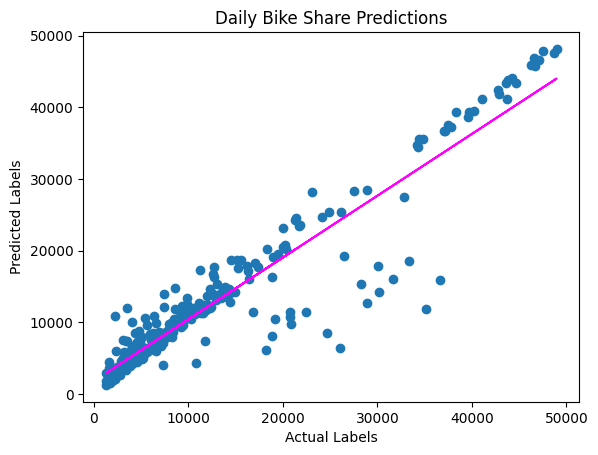

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor().fit(X_train, y_train)
print (model_rf, "\n")

# Evaluate the model using the test data
predictions = model_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

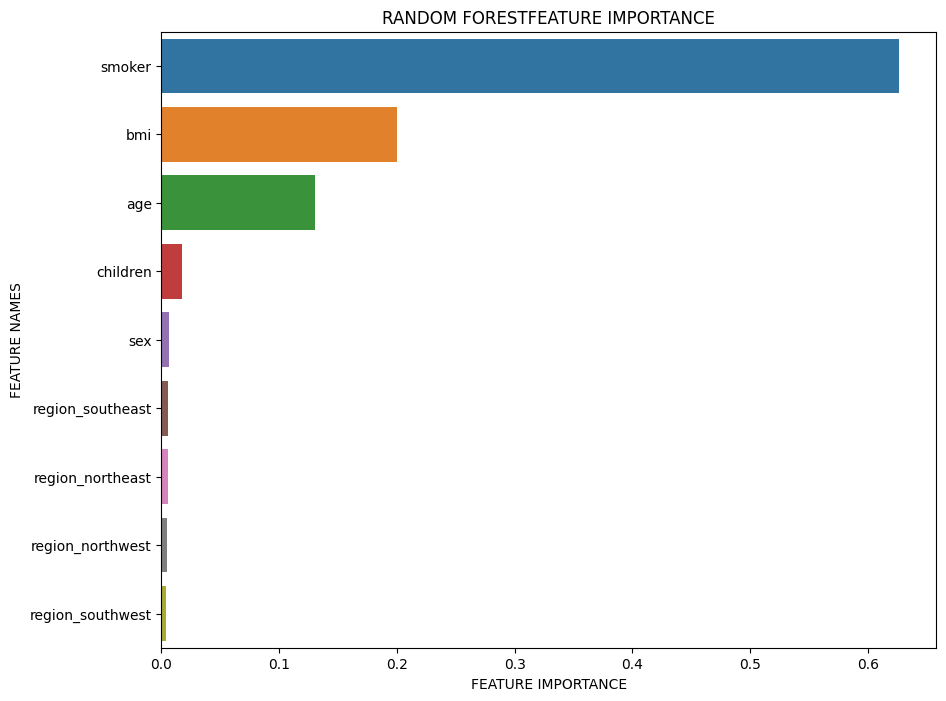

In [33]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)

feature_importances = rf_fit.feature_importances_

plot_feature_importance(rf_fit.feature_importances_,X_train.columns,'RANDOM FOREST')